In [40]:
import pandas as pd
import matplotlib.pyplot as plt


In [41]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [42]:
df = pd.read_csv("data\olid-training-v1.0.tsv", sep="\t")

In [43]:
def compute_label(a, b, c):
    if a == 'NOT':
        return a
    elif b == 'UNT':
        return b
    else:
        return c

In [44]:
df['label'] = df.apply(lambda x: compute_label(x.subtask_a, x.subtask_b, x.subtask_c), axis=1)

In [45]:
count = df.groupby('label').size().to_dict()

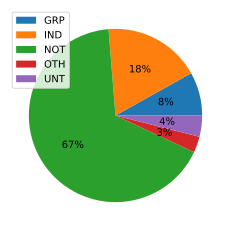

In [46]:
plt.pie(x=count.values(), autopct='%.0f%%')
plt.legend(count.keys())
#plt.savefig("1.pdf", bbox_inches='tight')
plt.show()

In [135]:
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
#tweet_tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, match_phone_numbers=False)
#docs = [tweet_tokenizer.tokenize(tweet) for tweet in df.tweet]

In [136]:
from spacy.lang.en import stop_words
from string import punctuation
import emoji

In [137]:
stop_words = stop_words.STOP_WORDS
stop_words = stop_words.union(set(emoji.get_emoji_unicode_dict('en').values()))
stop_words.add("url")
stop_words = stop_words.union(set(punctuation))

In [138]:
def tweet_tokenization(doc):
    tweet_tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, match_phone_numbers=False)
    tweet_tokenize = [tweet_tokenizer.tokenize(tweet) for tweet in doc]
    return tweet_tokenize


In [140]:
def stop_word_removal(doc, stop_words):
    new_tweets = []
    for t in doc:
        new_words = []
        for word in t:
            if word not in stop_words:
                new_words.append(word)
        new_tweets.append(new_words)

    return new_tweets

    #docs = [[word for word in doc if word not in stop_words] for doc in tweet_tokenize]

In [141]:
def hashtag_removal(doc):
    new_docs = []
    for t in doc:
        new_doc=[]
        for word in t:
            if word[0] == "#":
                new_doc.append(word[1:])
            else:
                new_doc.append(word)
        new_docs.append(new_doc)
    
    return new_docs

In [68]:
tweets = df["tweet"]
tweets

0        @USER She should ask a few native Americans wh...
1        @USER @USER Go home you’re drunk!!! @USER #MAG...
2        Amazon is investigating Chinese employees who ...
3        @USER Someone should'veTaken" this piece of sh...
4        @USER @USER Obama wanted liberals &amp; illega...
                               ...                        
13235    @USER Sometimes I get strong vibes from people...
13236    Benidorm ✅  Creamfields ✅  Maga ✅   Not too sh...
13237    @USER And why report this garbage.  We don't g...
13238                                          @USER Pussy
13239    #Spanishrevenge vs. #justice #HumanRights and ...
Name: tweet, Length: 13240, dtype: object

In [69]:
tweet_tokenization = tweet_tokenization(tweets)
tweet_remove_stop_word = stop_word_removal(tweet_tokenization, stop_words)
tweet_remove = hashtag_removal(tweet_remove_stop_word)

In [70]:
from wordcloud import WordCloud

In [71]:
def draw_wordcloud(tweet_remove):
    text = " ".join([word for doc in tweet_remove for word in doc])
    wordcloud = WordCloud(width=4000, height=2000).generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

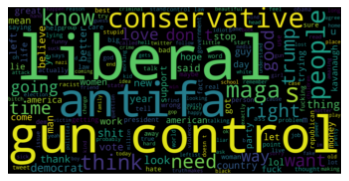

In [57]:
draw_wordcloud(tweet_remove)

Not Offensive

2        Amazon is investigating Chinese employees who ...
4        @USER @USER Obama wanted liberals &amp; illega...
8                               @USER Buy more icecream!!!
10       @USER @USER @USER It’s not my fault you suppor...
11       @USER What’s the difference between #Kavanaugh...
                               ...                        
13232    @USER She is not the brightest light on the tree.
13233    @USER 😂😂😂😂😂😂 if I say you are mad now you will...
13234    @USER @USER @USER @USER @USER @USER @USER @USE...
13236    Benidorm ✅  Creamfields ✅  Maga ✅   Not too sh...
13239    #Spanishrevenge vs. #justice #HumanRights and ...
Name: tweet, Length: 8840, dtype: object


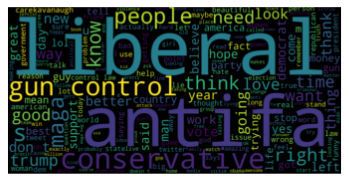

In [79]:
not_offensive = df[df["subtask_a"] == "NOT"]["tweet"]
tweet_tokenization = tweet_tokenization(not_offensive)
tweet_remove_stop_word = stop_word_removal(tweet_tokenization, stop_words)
tweet_remove = hashtag_removal(tweet_remove_stop_word)
draw_wordcloud(tweet_remove)

Offensive

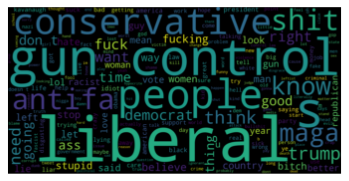

In [119]:
offensive = df[df["subtask_a"] == "OFF"]["tweet"]
tweet_tokenization = tweet_tokenization(offensive)
tweet_remove_stop_word = stop_word_removal(tweet_tokenization, stop_words)
tweet_remove = hashtag_removal(tweet_remove_stop_word)
draw_wordcloud(tweet_remove)

Targeted Offensive

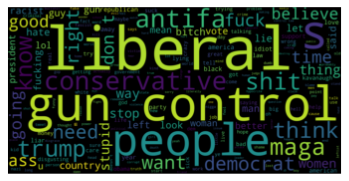

In [126]:
targeted_offensive = df[df["subtask_b"] == "TIN"]["tweet"]
tweet_tokenization = tweet_tokenization(targeted_offensive)
tweet_remove_stop_word = stop_word_removal(tweet_tokenization, stop_words)
tweet_remove = hashtag_removal(tweet_remove_stop_word)
draw_wordcloud(tweet_remove)

Individual Offensive

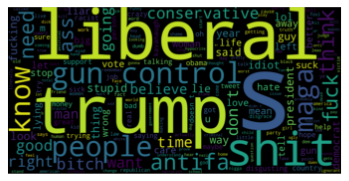

In [133]:
individual_offensive = df[df["subtask_c"] == "IND"]["tweet"]
tweet_tokenization = tweet_tokenization(individual_offensive)
tweet_remove_stop_word = stop_word_removal(tweet_tokenization, stop_words)
tweet_remove = hashtag_removal(tweet_remove_stop_word)
draw_wordcloud(tweet_remove)

Group Offensive

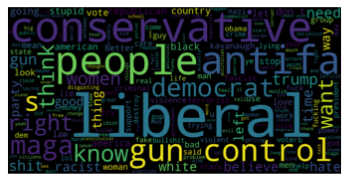

In [142]:
group_offensive = df[df["subtask_c"] == "GRP"]["tweet"]
tweet_tokenization = tweet_tokenization(group_offensive)
tweet_remove_stop_word = stop_word_removal(tweet_tokenization, stop_words)
tweet_remove = hashtag_removal(tweet_remove_stop_word)
draw_wordcloud(tweet_remove)